In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [2]:
sig_stack_tot = [0 for i in range(270)]
for i in range(270):
    sig_stack_tot[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/stacks/sig/sig'+str(i)+'.npy')

In [3]:
for_stack_tot = [0 for i in range(270)]
for i in range(270):
    for_stack_tot[i] = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/stacks/for/for'+str(i)+'.npy')

In [4]:
np.shape(sig_stack_tot)

(270, 50, 50)

In [5]:
sig_stack_avg = np.nanmean(sig_stack_tot, axis = 0)
for_stack_avg = np.nanmean(for_stack_tot, axis = 0)

In [7]:
beam_res = 1
stack_dim = 0.28

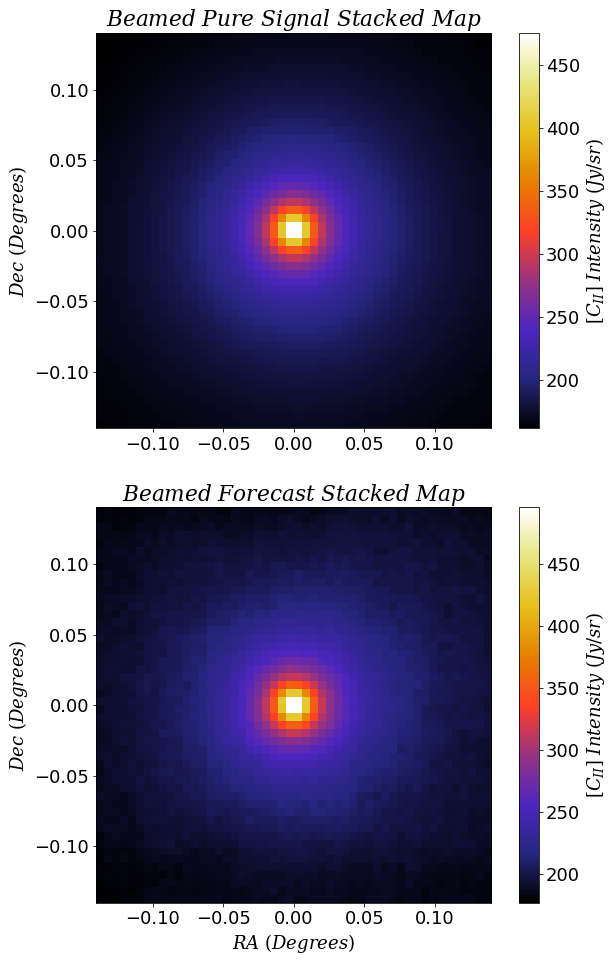

In [9]:
fig , axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 16))

plt.subplot(211)
plt.imshow(gaussian_filter(sig_stack_avg, beam_res), cmap = 'CMRmap', extent = [-stack_dim/2, stack_dim/2, -stack_dim/2, stack_dim/2])
plt.title(r'$Beamed\ Pure\ Signal\ Stacked\ Map$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$[C_{II}]\ Intensity\ (Jy/sr)$')


plt.subplot(212)
plt.imshow(for_stack_avg, cmap = 'CMRmap', extent = [-stack_dim/2, stack_dim/2, -stack_dim/2, stack_dim/2])
plt.title(r'$Beamed\ Forecast\ Stacked\ Map$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$[C_{II}]\ Intensity\ (Jy/sr)$')


plt.savefig('Stacking/jul31_270GHz_n50_avg.png', bbox_inches = "tight")

plt.show()

In [146]:
def radial_profile(data):
    
    ## data = (n, n) shape
    
    n = len(data)
    
    center_y = int(n/2)
    center_x = center_y
    
    center = (center_x, center_y)
    
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    
    return radialprofile

In [147]:
rad_sig = radial_profile(sig_stack_avg)
rad_for = radial_profile(for_stack_avg)

In [134]:
len(rad_for)

79

In [150]:
deg_per_pix = 0.28/50 # stack_dim/n
deg_away = np.linspace(0, (len(rad_sig) - 1)*deg_per_pix, len(rad_sig))

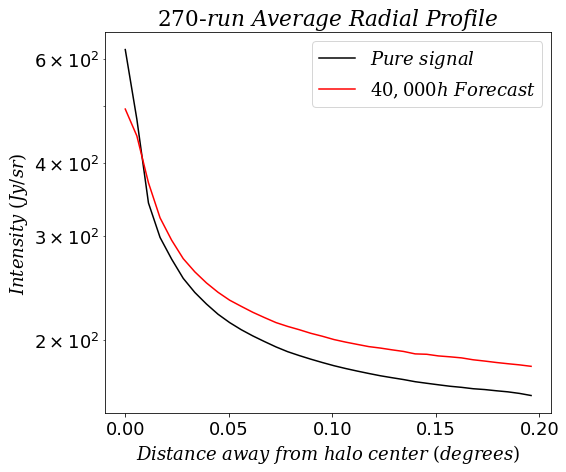

In [151]:
plt.plot(deg_away, rad_sig, 'k', label = r'$Pure\ signal$')
plt.plot(deg_away, rad_for, 'r', label = r'$40,000h\ Forecast$')

plt.title(r'$270$'+'-'+'$run\ Average\ Radial\ Profile$')
plt.xlabel(r'$Distance\ away\ from\ halo\ center\ (degrees)$')
plt.ylabel(r'$Intensity\ (Jy/sr)$')

plt.yscale('log')

plt.legend(bbox_to_anchor = (1,1))
#plt.savefig('Stacking/rprofile_tobs40kh_270run-avg_z6.png', bbox_inches = 'tight')

In [152]:
rad_sig_tot = [0 for i in range(270)]
rad_for_tot = [0 for i in range(270)]

for i in range(270):
    
    rad_sig_tot[i] = radial_profile(sig_stack_tot[i])
    rad_for_tot[i] = radial_profile(for_stack_tot[i])

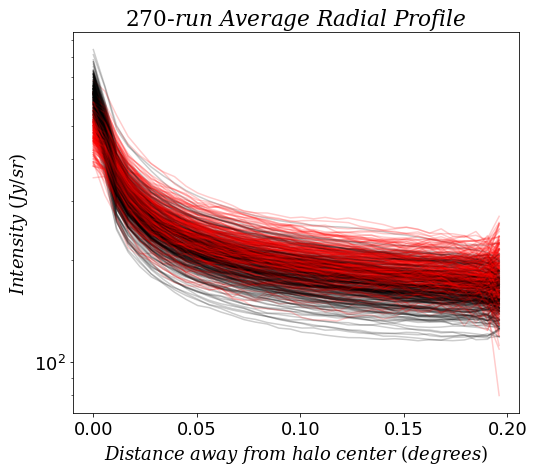

In [153]:
for i in range(270):
    
    plt.plot(deg_away, rad_sig_tot[i], 'k', label = r'$Pure\ signal$', alpha = 0.2)
    plt.plot(deg_away, rad_for_tot[i], 'r', label = r'$40,000h\ Forecast$', alpha = 0.2)

    plt.title(r'$270$'+'-'+'$run\ Average\ Radial\ Profile$')
    plt.xlabel(r'$Distance\ away\ from\ halo\ center\ (degrees)$')
    plt.ylabel(r'$Intensity\ (Jy/sr)$')

    plt.yscale('log')

    #plt.legend(bbox_to_anchor = (1,1))

In [155]:
err_rsig = np.std(rad_sig_tot, axis = 0)
err_rfor = np.std(rad_for_tot, axis = 0)

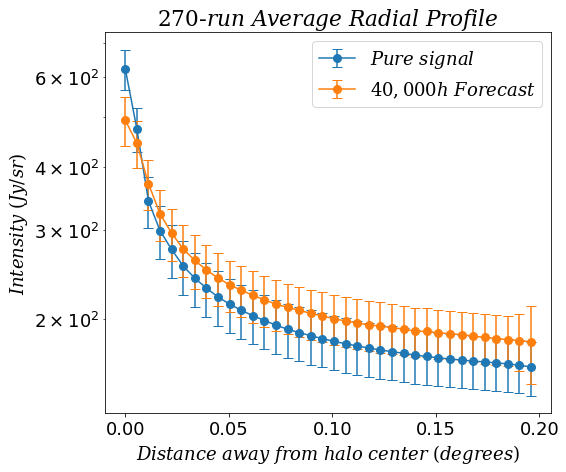

In [170]:
plt.errorbar(deg_away, rad_sig, yerr = err_rsig, fmt = '-o', markersize = 8, capsize = 5, label = r'$Pure\ signal$')
plt.errorbar(deg_away, rad_for, yerr = err_rfor, fmt = '-o', markersize = 8, capsize = 5, label = r'$40,000h\ Forecast$')
#plt.set_markeredgewidth(1)

plt.title(r'$270$'+'-'+'$run\ Average\ Radial\ Profile$')
plt.xlabel(r'$Distance\ away\ from\ halo\ center\ (degrees)$')
plt.ylabel(r'$Intensity\ (Jy/sr)$')

plt.yscale('log')

plt.legend(bbox_to_anchor = (1,1))
#plt.savefig('Stacking/rprofile_tobs40kh_270run-avg_z6.png', bbox_inches = 'tight')

Debug:

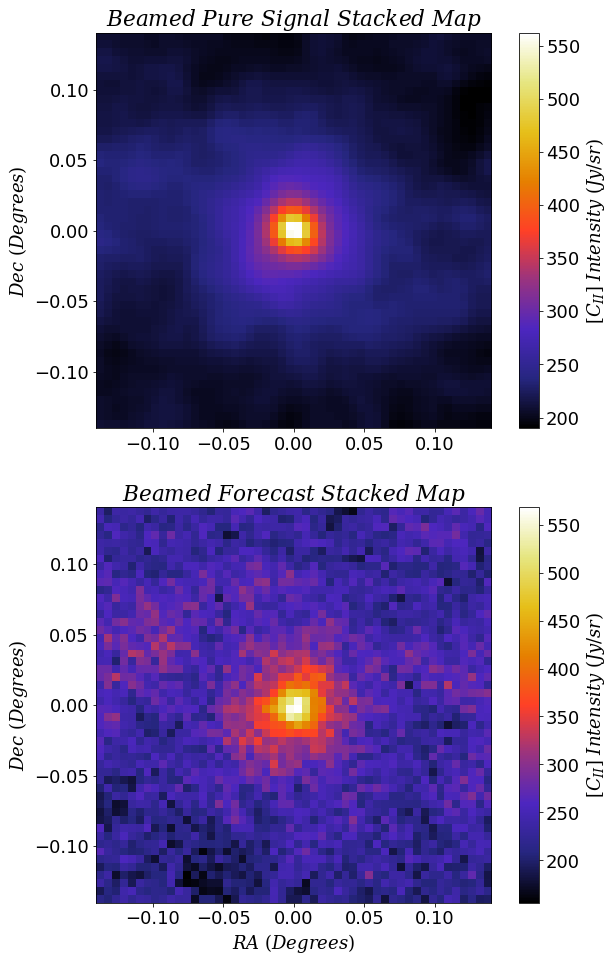

In [119]:
j = 2

fig , axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 16))

plt.subplot(211)
plt.imshow(gaussian_filter(sig_stack_tot[j], beam_res), cmap = 'CMRmap', extent = [-stack_dim/2, stack_dim/2, -stack_dim/2, stack_dim/2])
plt.title(r'$Beamed\ Pure\ Signal\ Stacked\ Map$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$[C_{II}]\ Intensity\ (Jy/sr)$')


plt.subplot(212)
plt.imshow(for_stack_tot[j], cmap = 'CMRmap', extent = [-stack_dim/2, stack_dim/2, -stack_dim/2, stack_dim/2])
plt.title(r'$Beamed\ Forecast\ Stacked\ Map$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$[C_{II}]\ Intensity\ (Jy/sr)$')

In [139]:
def radial_profile(data):
    
    ## data = (n, n) shape
    
    n = len(data)

    center_y = np.argmax(data)%n - 1
    center_x = np.argmax(data) - (center_y)*n
    
    center = (center_x, center_y)
    
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    
    return center, r, tbin, nr, radialprofile

In [120]:
bad_data = sig_stack_tot[2]

In [142]:
center_g, r_g, tbin_g, nr_g, radialprofile_g = radial_profile(sig_stack_tot[0])

/tmp/ipykernel_600731/2758972401.py:18: RuntimeWarning: invalid value encountered in divide
  radialprofile = tbin / nr


In [140]:
center_b, r_b, tbin_b, nr_b, radialprofile_b = radial_profile(sig_stack_tot[2])

In [145]:
len(bad_data)/2

25.0

In [82]:
15%6

3

In [93]:
sig_ex = np.load('stack_ex.npy')

In [94]:
sig_ex

array([[826.4978458 , 807.91025158, 541.75839197],
       [798.38598284, 792.06059345, 542.03000695],
       [527.85855969, 537.11206332, 468.27572325]])

In [98]:
sig_ex_t = np.array([[800 , 10000.91025158, 541.75839197],
       [798.38598284, 792.06059345, 542.03000695],
       [527.85855969, 537.11206332, 468.27572325]])

In [102]:
np.ravel(sig_ex_t)

array([  800.        , 10000.91025158,   541.75839197,   798.38598284,
         792.06059345,   542.03000695,   527.85855969,   537.11206332,
         468.27572325])

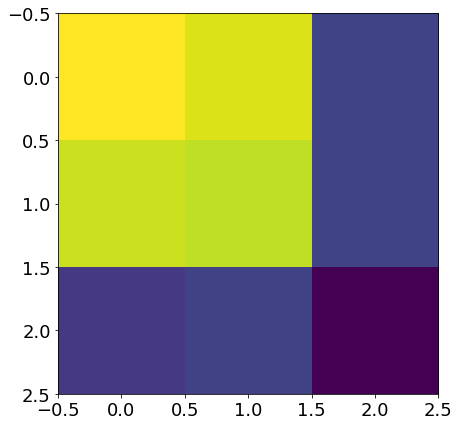

In [95]:
plt.imshow(sig_ex)

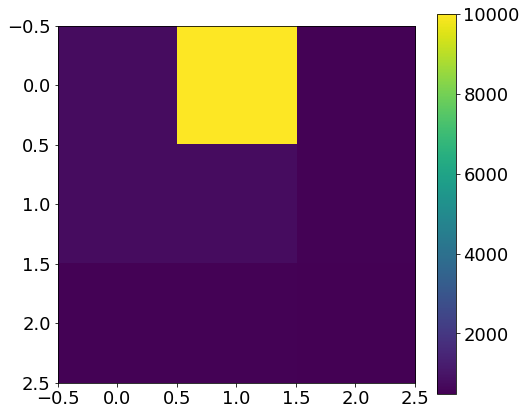

In [99]:
plt.imshow(sig_ex_t)
plt.colorbar()